In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [3]:
# 학습 결과 plotting 함수
# loss 출력
def plot_loss(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [4]:
# Accuracy 출력    
def plot_accuracy(epochs, history):
    plt.figure(figsize=(7,6))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label="Train Accuracy")
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accurach')
    plt.legend()
    plt.show()

### 데이터 로딩

In [5]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

### 하이퍼파라미터, 변수 정의

In [6]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

# 데이터개수
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

### 전처리
- image : 0 ~ 1 로 정규화
- label : one hot encoding

In [7]:
X_train = (train_image/255.0).astype(np.float32)
X_test = (test_image/255.0).astype(np.float32)

In [8]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [9]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test), X_train.dtype

(0.0, 1.0, 0.0, 1.0, dtype('float32'))

In [10]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Dataset 생성

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 모델의 크기 변경

In [16]:
# smaller model
def create_small_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=8, activation='relu')) #hidden
    model.add(layers.Dense(units=10, activation='softmax')) #output
    return model

In [17]:
model = create_small_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/50
600/600 [==============================] - 3s 3ms/step - loss: 0.7702 - accuracy: 0.7874 - val_loss: 0.3830 - val_accuracy: 0.8983
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3559 - accuracy: 0.9017 - val_loss: 0.3180 - val_accuracy: 0.9133
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3173 - accuracy: 0.9113 - val_loss: 0.3055 - val_accuracy: 0.9145
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.3007 - accuracy: 0.9156 - val_loss: 0.2921 - val_accuracy: 0.9203
Epoch 5/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2899 - accuracy: 0.9191 - val_loss: 0.2870 - val_accuracy: 0.9233
Epoch 6/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2822 - accuracy: 0.9215 - val_loss: 0.2810 - val_accuracy: 0.9226
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2764 - accuracy: 0.9229 - val_loss: 0.2792 - val_accuracy: 0.9227
Epoch 

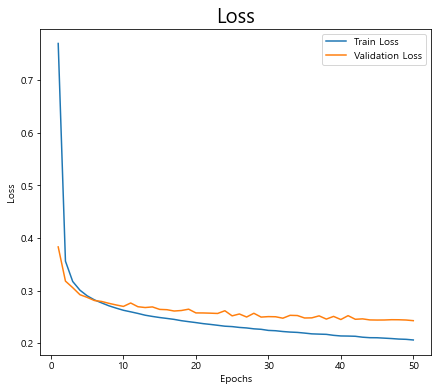

In [21]:
plot_loss(N_EPOCHS, hist)

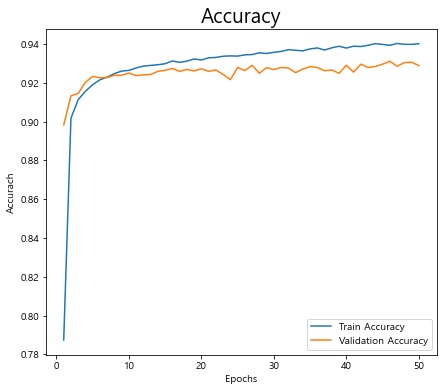

In [23]:
plot_accuracy(50, hist)

In [24]:
# 위의 모델보다 큰 모델
# hidden layer: Dense: 4개, 각각 unit: 256, 256, 128, 128, actitivation: relu
def create_bigger_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax')) #출력
    return model

In [25]:
# 모델 생성 + compile
model = create_bigger_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [26]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2445 - accuracy: 0.9264 - val_loss: 0.1085 - val_accuracy: 0.9663
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0911 - accuracy: 0.9714 - val_loss: 0.0873 - val_accuracy: 0.9730
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.0712 - val_accuracy: 0.9789
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0695 - val_accuracy: 0.9790
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0850 - val_accuracy: 0.9763
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0763 - val_accuracy: 0.9795
Ep

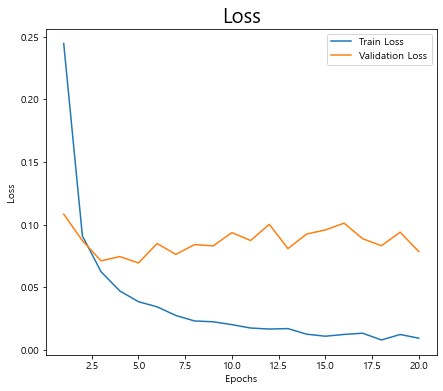

In [27]:
plot_loss(N_EPOCHS, hist)

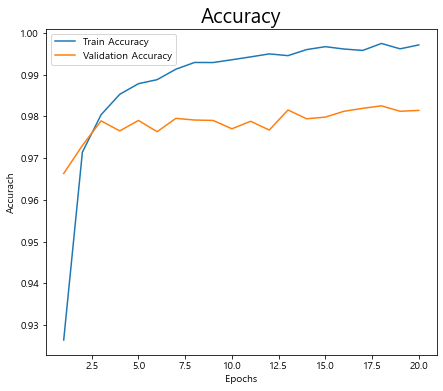

In [28]:
plot_accuracy(N_EPOCHS, hist)

In [29]:
def create_biggest_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=2048, activation='relu'))
    model.add(layers.Dense(units=2048, activation='relu'))
    
    model.add(layers.Dense(units=1024, activation='relu'))
    model.add(layers.Dense(units=1024, activation='relu'))
    
    model.add(layers.Dense(units=512, activation='relu'))
    model.add(layers.Dense(units=512, activation='relu'))
    
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [31]:
model = create_biggest_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 512)              

In [32]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 116s 192ms/step - loss: 0.2859 - accuracy: 0.9182 - val_loss: 0.1578 - val_accuracy: 0.9586
Epoch 2/20
600/600 [==============================] - 110s 183ms/step - loss: 0.1320 - accuracy: 0.9675 - val_loss: 0.1163 - val_accuracy: 0.9690
Epoch 3/20
600/600 [==============================] - 110s 182ms/step - loss: 0.0990 - accuracy: 0.9760 - val_loss: 0.1053 - val_accuracy: 0.9725
Epoch 4/20
600/600 [==============================] - 121s 202ms/step - loss: 0.0798 - accuracy: 0.9809 - val_loss: 0.1058 - val_accuracy: 0.9766
Epoch 5/20
600/600 [==============================] - 117s 195ms/step - loss: 0.0711 - accuracy: 0.9832 - val_loss: 0.1116 - val_accuracy: 0.9766
Epoch 6/20
600/600 [==============================] - 113s 188ms/step - loss: 0.0611 - accuracy: 0.9859 - val_loss: 0.0966 - val_accuracy: 0.9789
Epoch 7/20
600/600 [==============================] - 117s 195ms/step - loss: 0.0521 - accuracy: 0.9881 - val_loss: 0.1329 -

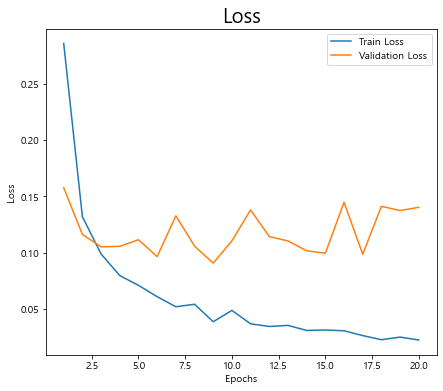

In [33]:
plot_loss(N_EPOCHS, hist)

# Dropout 예제
- dropout 각 레이어에 적용
    - dropout은 layers.Dropout 객체를 사용
    - 객체 생성시 dropout_rate 설정: 0.2 ~ 0.5
    - Drop시킬 노드를 가진 Layer앞에 추가

In [12]:
# DROPOUT_RATE = 0.3 #모든 DROPUT레이어에 동일한 비율을 지정.
DROPOUT_RATE = 0.9 #DROPOUT RATE를 너무 크게 잡으면 UNDERFITTING 발생

def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(DROPOUT_RATE)) #학습시에만 작동을 한다. (검증, Test, 새로운데이터 추론는 적용이 안된다.)
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(DROPOUT_RATE))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(DROPOUT_RATE))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(DROPOUT_RATE))
    model.add(layers.Dense(units=10, activation='softmax')) #출력
    return model

In [13]:
model = create_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [38]:
N_EPOCHS*DROPOUT_RATE

6.0

In [14]:
#Dropout 을 사용하는 경우 Epoch수를 늘려준다.
#원래 epoch에서 dropout 비율만큼을 더한

hist = model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
600/600 [==============================] - 8s 11ms/step - loss: 8.8960 - accuracy: 0.1026 - val_loss: 2.3030 - val_accuracy: 0.1135
Epoch 2/3
600/600 [==============================] - 8s 13ms/step - loss: 2.4765 - accuracy: 0.1083 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/3
600/600 [==============================] - 8s 13ms/step - loss: 2.3470 - accuracy: 0.1090 - val_loss: 2.3012 - val_accuracy: 0.1135


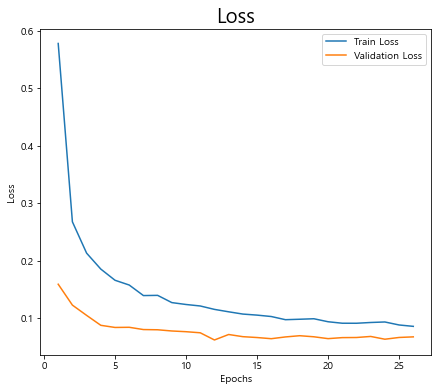

In [42]:
plot_loss(N_EPOCHS+6, hist)

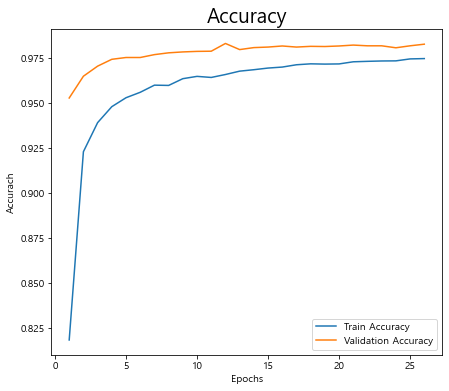

In [43]:
plot_accuracy(N_EPOCHS+6, hist)

# Batch Normalization
- Dense => BN => Activation

In [ ]:
# momentum : z score에 곱해주는 초기값
# scale: z score에 더해주는 초기값
# epsilon: z score계산시 분산값에 더해주는 값 = 0.001

In [49]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256)) #WX + b
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())#activation 함수
    
    
    model.add(layers.Dense(units=256))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Dense(units=10)) #출력
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    return model

In [15]:
LEARNING_RATE

0.001

In [50]:
model = create_bn_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 256)              

In [51]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 10s 14ms/step - loss: 0.3908 - accuracy: 0.9366 - val_loss: 0.1962 - val_accuracy: 0.9684
Epoch 2/20
600/600 [==============================] - 9s 14ms/step - loss: 0.1646 - accuracy: 0.9725 - val_loss: 0.1491 - val_accuracy: 0.9690
Epoch 3/20
600/600 [==============================] - 8s 13ms/step - loss: 0.1055 - accuracy: 0.9803 - val_loss: 0.0864 - val_accuracy: 0.9800
Epoch 4/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0750 - accuracy: 0.9845 - val_loss: 0.0876 - val_accuracy: 0.9791
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0604 - accuracy: 0.9864 - val_loss: 0.0635 - val_accuracy: 0.9842
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0452 - accuracy: 0.9902 - val_loss: 0.0700 - val_accuracy: 0.9799
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0415 - accuracy: 0.9897 - val_loss: 0.0655 - val_accuracy: 0.9818


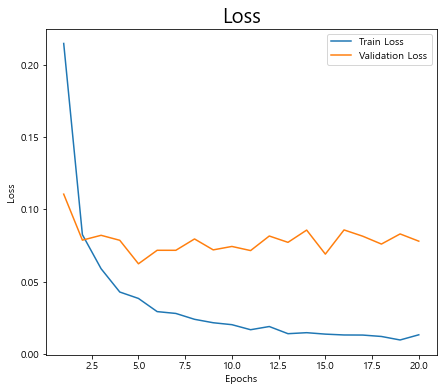

In [47]:
plot_loss(N_EPOCHS, hist)

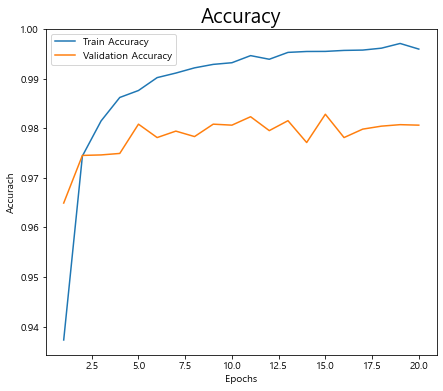

In [48]:
plot_accuracy(N_EPOCHS, hist)

# 가변 LearningRate(학습률)를 이용한 성능개선
- 기본 개념: learning rate를 크게 잡고 epoch이 진행할 수록 learning rate를 줄여주는 방식.

### 1. Learning Rate scheduler 이용
- 공학적 처리 - 지정한(일정한) step 마다 learning rate를 일정한 비율로 변경

In [19]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [21]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [36]:
# optimizer에 고정된 learning rate 대신에 Learning Rate Scheduler를 생성해서 등록
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, # 초기(시작) 학습률
                                                           decay_steps= 600*5, # 몇 step마다 learing rate를 변경할 것인지 지정. (1에폭당 600스텝-600*5: 5에폭 당 LR를 변경)
                                                           decay_rate=0.5, # 변화율. 현재 Learning Rate * decay_rate = 새 Learing rate
                                                           staircase=True # 계단형태로 떨어트릴지(True), step마다 조금씩 떨어트릴지(False) 설정
                                                          )
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.2580 - accuracy: 0.9237 - val_loss: 0.1134 - val_accuracy: 0.9655
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0986 - accuracy: 0.9699 - val_loss: 0.0818 - val_accuracy: 0.9736
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0890 - val_accuracy: 0.9725 loss: 0.0659 - accu
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0823 - val_accuracy: 0.9752
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0733 - val_accuracy: 0.9769
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0174 - accuracy: 0.9947 - val_loss: 0.0622 - val_accuracy: 0.9811
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0609 - val_acc

### 2. Callback을 이용
- 학습도중에 성능이 개선되지 않을 때 마다 learning rate를 변경

> callback - 실행환경이 호출에 의해서 호출되는 정의된 기능(함수, 메소드)
>  실행도중에 어떤 변화가 발생할 때 마다 호출하는 기능.

In [38]:
# val_loss(monitor) 가 3(patience) epoch동안 개선이 없으면 현재 learning_rate에 0.2(factor)곱한 것을 새 learing_rate으로 사용.
# factor : 0 ~ 1(0.x)
# patience: 10~
# monitor: validation loss를 지정.
lr_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=2) #verbose: learning rate 변경시 로그남긴다.

# callback 은 fit() 안에서 등록(설정)

In [40]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=test_dataset, 
                 callbacks=[lr_callback]) #학습할 때 사용할 callback은 여러개 지정할 수 있기 때문에 list로 설정.

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2587 - accuracy: 0.9250 - val_loss: 0.1295 - val_accuracy: 0.9613
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.0858 - val_accuracy: 0.9732
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0740 - val_accuracy: 0.9767
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0729 - val_accuracy: 0.9785
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0822 - val_accuracy: 0.9753
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0818 - val_accuracy: 0.9768
Epoch 